# Inventories Deliverable December 2021

In [4]:
import pandas as pd

import os
from tqdm import tqdm

import glob 
import plotly
import plotly.express as px
import plotly.graph_objects as go
#import dash  # (version 1.12.0) pip install dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import numpy as np 
from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc

from plotly.offline import iplot, init_notebook_mode

#app = dash.Dash(__name__ , external_stylesheets= [dbc.themes.CYBORG])
#app = JupyterDash(__name__, external_stylesheets= [dbc.themes.CYBORG])
app = JupyterDash(__name__, )

#https://stackoverflow.com/questions/54064245/plot-ly-offline-mode-in-jupyter-lab-not-displaying-plots
#https://stackoverflow.com/questions/62325068/cannot-install-latest-nodejs-using-conda-on-mac
#NB install a more updated version of nodejs, default anaconda install does not work! 
#USE: conda install nodejs -c conda-forge --repodata-fn=repodata.json


### Extracting the data from the saved CSV files 

In [103]:
db = 'era5_1'
dir = '../inventories'
full_path = dir + '/' + db 


In [104]:
files = glob.glob(full_path + '/*_reduced*')


In [105]:
files[1]


'../inventories/era5_1/era5.conv._40957_inventories_reduced.csv'

In [106]:
def get_all_df_per_db(db):
    
    dir = '/users/staff/federico/GitHub/CEUAS_master_SEPTEMBER2021/CEUAS/CEUAS/meta/inventory_comparison/code/inventories'
    print('*** DB: --- ' , db )
    full_path = dir + '/' + db 
    
    files = glob.glob(full_path + '/*_reduced*')
    f_names = [f.split('/')[-1].split('_inv')[0] for f in files ]
    print('       Reading all station df')
    df_all = [pd.read_csv(f, sep= '\t') for f in files]
    
    
    all_lats = [ eval(df['lat_file'][0])[0] for df in df_all ]
    all_lons = [ eval(df['lon_file'][0])[0] for df in df_all ]
    all_names = [ df['station_name'][0] for df in df_all]
    all_stationId = [ df['station_id'][0] for df in df_all]
    is_radio = [ df['isRadio'][0] for df in df_all]
    
    # extracting wigos for each inventory
    wigos_o, wigos_i, wigos_w, wigos_c = [],[],[],[]

    print('       Creating combined df')
    for df in tqdm(df_all):
        o = wigos_o.append( (df.loc[df['inventory'] == 'OSCAR'])['WIGOS_calc'].values[0] ) 
        i = wigos_i.append( (df.loc[df['inventory'] == 'IGRA2'])['WIGOS_calc'].values[0] )
        w = wigos_w.append( (df.loc[df['inventory'] == 'WBAN' ])['WIGOS_calc'].values[0] )
        c = wigos_c.append( (df.loc[df['inventory'] == 'CHUAN'])['WIGOS_calc'].values[0] )
    
    # Creating a dataframe
    df = pd.DataFrame( {'stationId': all_stationId,
                    'lat': all_lats , 'lon':all_lons, 
                    'station': all_names , 
                    "OSCAR": wigos_o,
                    'isRadio': is_radio,
                    "IGRA2": wigos_i,
                    "WBAN": wigos_w,
                    "CHUAN": wigos_c,
                    "file" : f_names } )
    df['db'] = db
    return df 


databases = ['era5_1' , 'era5_2' , 'igra2']
all_df = [ get_all_df_per_db(d) for d in databases ]
all_df = pd.concat(all_df)


*** DB: ---  era5_1
       Reading all station df
       Creating combined df


100%|██████████| 4335/4335 [00:06<00:00, 721.29it/s]


*** DB: ---  era5_2
       Reading all station df
       Creating combined df


100%|██████████| 7178/7178 [00:10<00:00, 712.56it/s]


*** DB: ---  igra2
       Reading all station df
       Creating combined df


100%|██████████| 2689/2689 [00:03<00:00, 748.69it/s]


In [6]:
#db = 'era5_1'

#full_path = dir + '/' + db 
#files = glob.glob(full_path + '/*_reduced*')

In [4]:
# Extracting all csv to df in a list

In [15]:
# df_all = [pd.read_csv(f, sep= '\t') for f in files]
# df_all[50]
#df_all['station_id'] = [ str(i).replace('.0','') for i in df_all.station_id ]

# creating a dataframe 
# df_all_df = pd.concat(df_all)
# df_all_df['station_id'] = [ str(i).replace('.0','') for i in df_all_df.station_id ]


file_statid  station_id         station_name   latitude   longitude  \
0        94337     94337.0  JULIA CREEK AIRPORT -20.667222  141.721389   
1        94337         NaN                  NaN        NaN         NaN   
2        94337         NaN                  NaN        NaN         NaN   
3        94337         NaN                  NaN        NaN         NaN   

  original_lat original_lon  distance_km          lat_file          lon_file  \
0    20 40 02S   141 43 17E          3.1  [-20.66, -20.66]  [141.75, 141.75]   
1          NaN          NaN          NaN  [-20.66, -20.66]  [141.75, 141.75]   
2          NaN          NaN          NaN  [-20.66, -20.66]  [141.75, 141.75]   
3          NaN          NaN          NaN  [-20.66, -20.66]  [141.75, 141.75]   

   ... WMO_id       WIGOS_calc  file_min_date file_max_date  start_date  \
0  ...    NaN  0-20000-0-94337       19790504      19790504       999.0   
1  ...    NaN    0-20300-0-nan       19790504      19790504         NaN   
2  ...    NaN    0-20500-0-nan       19790504      19790504         NaN   
3  ...    NaN    0-20400-0-nan       19790504      19790504         NaN   

   end_date  isRadio       WIGOS_best       city  \
0     999.0    False  0-20000-0-94337  mount isa   
1       NaN      NaN  0-20000-0-94337  mount isa   
2       NaN      NaN  0-20000-0-94337  mount isa   
3       NaN      NaN  0-20000-0-94337  mount isa   

                                   variables  
0  [36, 38, 39, 85, 104, 105, 106, 107, 117]  
1  [36, 38, 39, 85, 104, 105, 106, 107, 117]  
2  [36, 38, 39, 85, 104, 105, 106, 107, 117]  
3  [36, 38, 39, 85, 104, 105, 106, 107, 117]  

[4 rows x 22 columns]

In [109]:
def make_map(df, db=''):
    
    #df["color"] = "blue"
    
    
    fig = go.Figure()

    fig=px.scatter_geo(df,lon='lon', lat='lat',
                       opacity=0.8,
                       #projection="natural earth",
                       hover_data={'stationId': True,
                                   'lon':True,'lat':True,'station':True,
                                   'OSCAR':True,
                                   'IGRA2':True,
                                   'WBAN' :True,
                                   "CHUAN":True,
                                  "isRadio":True,
                                  "file":True},
                      color = 'db',
                      title = 'Distribution of all ' + db + 'stations')
                       
                       
    
    """
    for s in ["0-20000-0-06610" , "0-20001-0-10393" ,"0-20001-0-11035" ]:
        a = np.where( df.primary_id == s )[0]
        df.at[a, 'color'] = 'red'
        fig.add_trace(
            go.Scattergeo(lon=df["longitude"], 
                          lat=df["latitude"],
                          color = df["color"]
                       #projection="natural earth",
                       #hover_data={'longitude':True,'latitude':True,'name':True, 'primary_id':True} )
                        ) )
        
        #fig.update_traces(marker=dict(color="red" , size = 10 ) )
    """
        
    fig.update_layout(
    title="Map for the Database " + db,

    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1000,
    height=500)

    return fig 

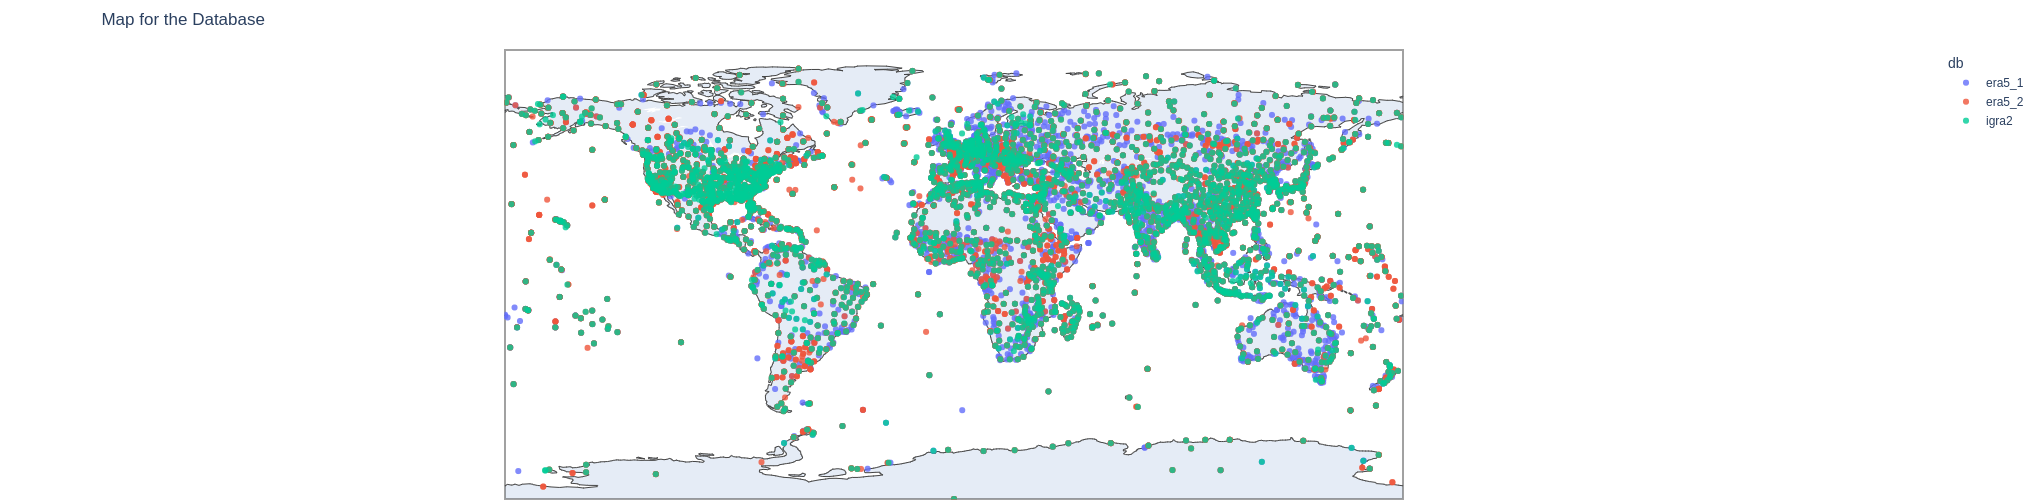

In [129]:
map = make_map(all_df , db='').show()


## Example Summary of selected stations

In this example we show the possbile mathicn ginventory entries found for a given file, e.g. 
era5.conv._11035 from the ERA% 1 dataset.

- **station_id** : as found in the station file
- **station_name**: as found in the correpsonding inventory (see *inventory* column)
- **latitude**, **longitude**: converted (from degree min sec to decimal) coordinates values from the inventory
- **original_lat**, **original_lon**: value as it is in the inventory (not converted)
- **distance_km**: distance between the inventory location and file coordinates
- **lat_file**, **lon_file**: list of the smalles and larges values of lat and lon found in the file
- **WIGOS**: WIGOS id found in the OSCAR inventory
- **WIGOS_calc**: WIGOS id created following our convention
- **WMO_id**: WMO id of the station accoridng to WBAN or CHUAN invetories




In [55]:
# e.g. Vienna
station = '11035'
#df_stat = pd.read_csv( full_path + '/' + [f for f in os.listdir(full_path) if station in f and '_red' not in f ][0], sep= '\t')
df_stat = pd.read_csv( full_path + '/' + [f for f in os.listdir(full_path) if station in f and '_red'  in f ][0], sep= '\t')

print(df_stat.columns)

#print(df_stat)
df_stat = df_stat.drop(columns=['original_lat', 'original_lon', 'WMO_id' , 'variables' , 'file_min_date',
       'file_max_date', 'start_date', 'end_date'] )

Index(['file_statid', 'station_id', 'station_name', 'latitude', 'longitude',
       'original_lat', 'original_lon', 'distance_km', 'lat_file', 'lon_file',
       'inventory', 'WIGOS', 'WMO_id', 'WIGOS_calc', 'file_min_date',
       'file_max_date', 'start_date', 'end_date', 'isRadio', 'WIGOS_best',
       'city', 'variables'],
      dtype='object')


In [36]:
#df_stat

In [52]:
df_stat.columns

Index(['file_statid', 'station_id', 'station_name', 'latitude', 'longitude',
       'distance_km', 'lat_file', 'lon_file', 'inventory', 'WIGOS',
       'WIGOS_calc', 'isRadio', 'WIGOS_best', 'city', 'color'],
      dtype='object')

In [65]:
list(columns.values())


[70, 70, 180, 100, 50, 50, 50, 70, 70, 70, 150, 150, 70, 150]

In [99]:
def summary_table(df_stat):

    import plotly.graph_objects as go


    try:
        for c in ['latitude' , 'longitude']:
            df_stat[c] =  df_stat[c].map('{:,.2f}'.format)
    except:
        pass

    df_stat['color'] = df_stat['inventory']


    d = {'OSCAR':'yellow', 'IGRA2': 'cyan', 'WBAN':'plum', 'CHUAN':'lightgray' }

    df_stat= df_stat.replace({'color': d})


    # column names and width

    columns = {'file_statid':70, 'station_id':70, 'station_name':180, 'city':100, 'latitude':50, 'longitude':50,
           'distance_km':70, 'lat_file':100, 'lon_file':100, 'inventory':70, 'WIGOS':130,
           'WIGOS_calc':130, 'isRadio':70, 'WIGOS_best':130}

    columns.values
    height = 40
    fig = go.Figure(data=[go.Table(
        columnwidth = list(columns.values()),
      header=dict(
        values = ['File StatId' , 'Inv. StatId' , 'Station' , 'City', 'Lat' , 'Lon' , 'Dist [Km]' , 'Lat File' , 'Lon File' , 'Inventory' , 'WIGOS' , 'WIGOS calc' , 'isRadio' , 'WIGOS Best'] ,
        fill_color='royalblue',
        align=['left','center'],
        font=dict(color='white', size=14),
        height=height,
      ),

      cells=dict(
        values= [df_stat[c] for c in list(columns.keys()) ],
        fill_color = [df_stat.color],
        height=height,
        font=dict(size=13),


      ) 
        ) ] )
      #  line_color=[df.Color], fill_color=[df.Color],
      #  align='center', font=dict(color='black', size=11)
      #))

    fig.update_layout(width=1800, height=(height+15)*(len(df_stat)))

    return fig



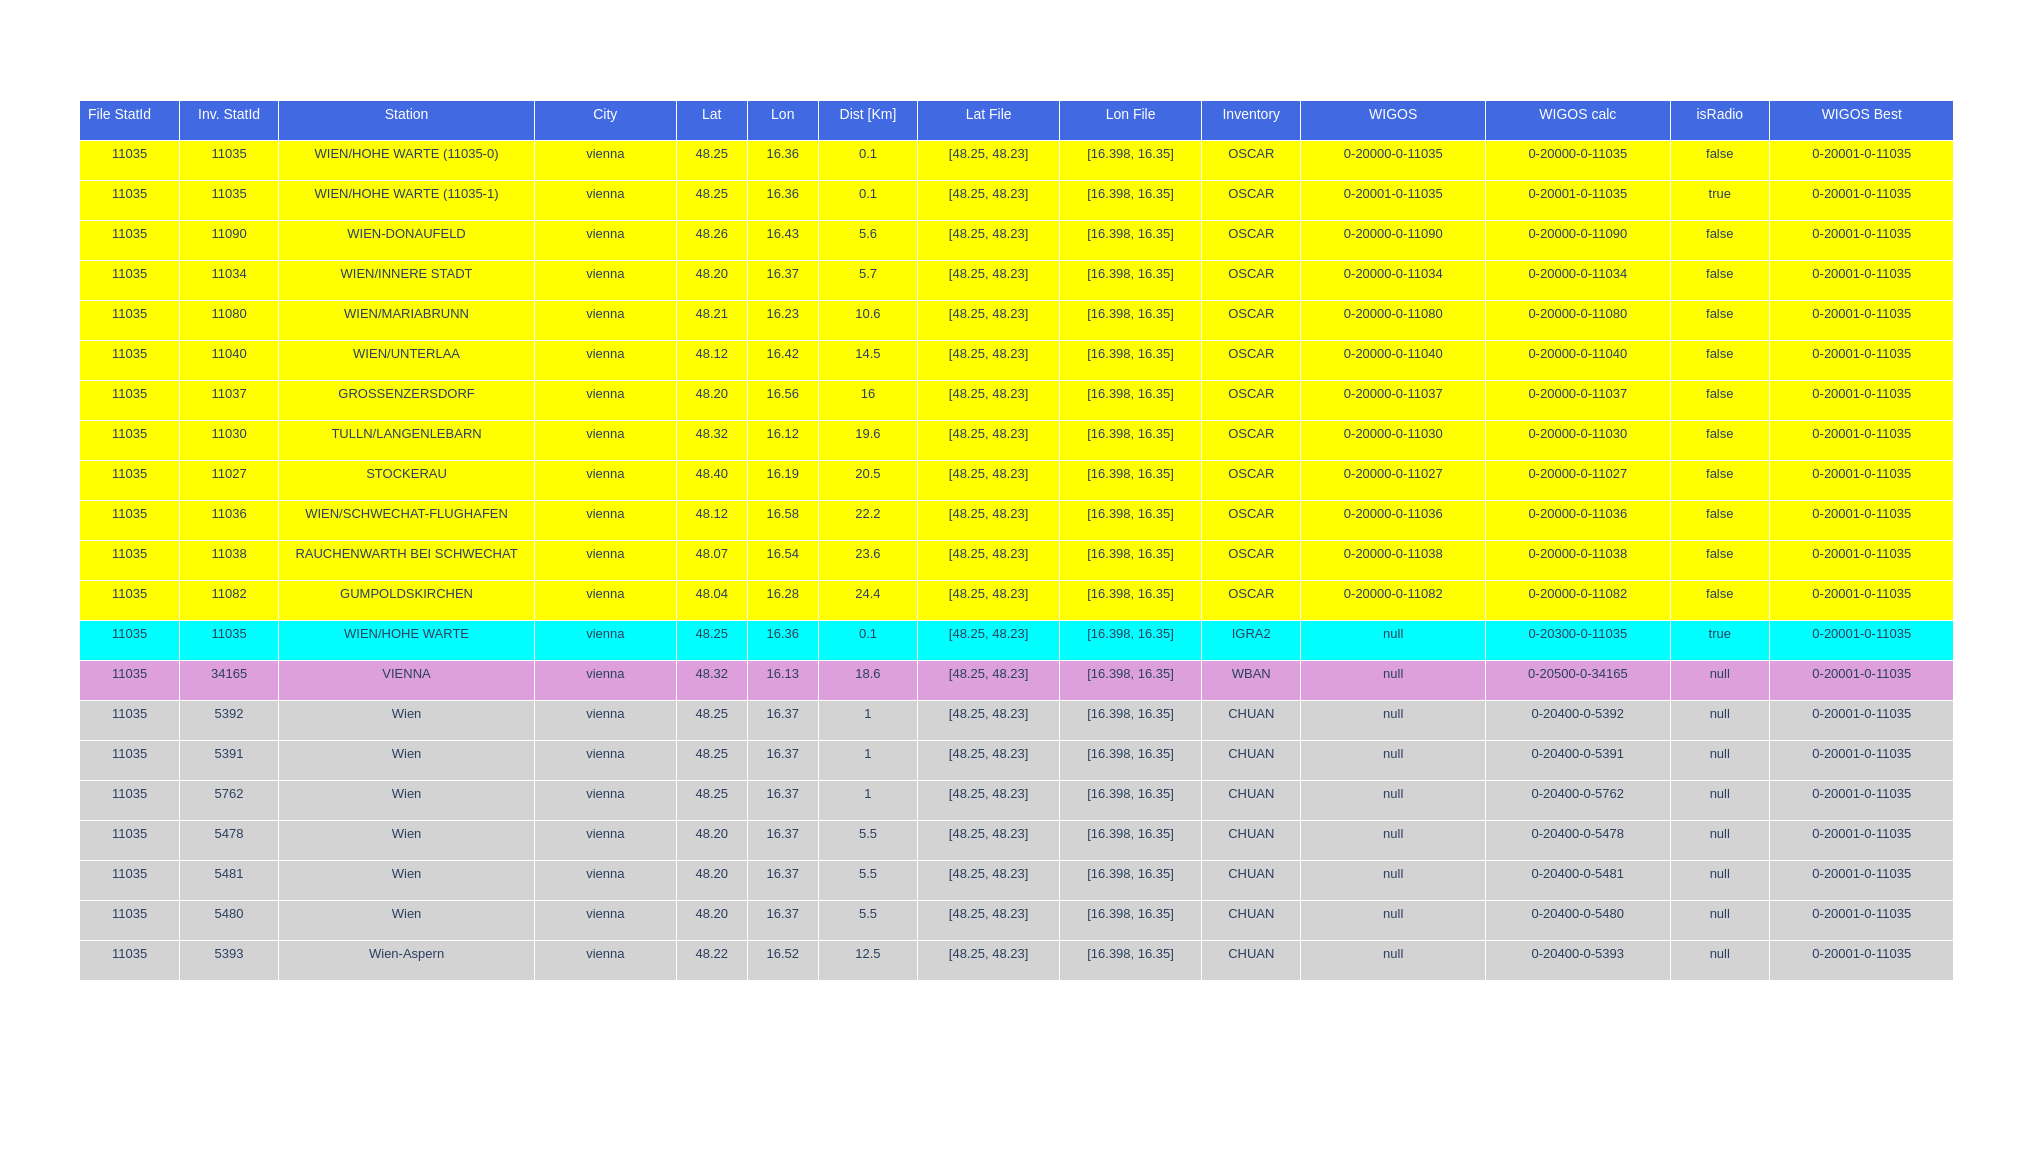

In [101]:
fig = summary_table(df_stat)
fig.show()

In [127]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"rowspan": 2}, {}],
           [None, {}]],
    subplot_titles=("First Subplot","Second Subplot", "Third Subplot"))

map =  make_map(all_df , db='') 

fig.add_trace( map,
                 row=1, col=1)


fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=2)


fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 1, 2]),
                 row=2, col=2)

fig.update_layout(showlegend=False, title_text="Specs with Subplot Title")
fig.update_layout(width=1800, height=1500  )

fig.show()


#map = make_map(all_df , db='').show()
#summary_table(df_stat)



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'customdata': [[24988.0, 142.33, 60.08, 'ARKA', '0-20000-0-24988',
                             '0-20300-0-nan', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._24988_inventories'], [40957.0,
                             62.28, 33.4, 'SHINDAND', '0-20000-0-40957',
                             '0-20300-0-nan', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._40957_inventories'], [91491.0,
                             -157.17, 1.72, 'CHRISTMAS ISLAND (91491-0)',
                             '0-20000-0-91491', '0-20300-0-nan', '0-20500-0-20505',
                             '0-20400-0-nan', False,
                             'era5.conv._91491_inventories'], ..., [60018, -16.367,
                             28.32, 'TENERIFE-GUIMAR', '0-20000-0-60018',
                             '0-20300-0-60018', '0-20500-0-12104',
                             '0-20400-0-5166', True,
                             'era5.conv._60018_inventories'], [8221, -3.57, 40.5,
                             'MADRID/BARAJAS', '0-20000-0-08221',
                             '0-20300-0-08221', '0-20500-0-14007',
                             '0-20400-0-5606', False,
                             'era5.conv._08221_inventories'], [6610.0, 7.015,
                             46.892, 'PAYERNE (6610-0)', '0-20000-0-06610',
                             '0-20300-0-06610', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'era5.conv._06610_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=era5_1<br>lat=%{customdata[' ... '{customdata[9]}<extra></extra>'),
              'lat': array([60.08 , 33.4  ,  1.72 , ..., 28.32 , 40.5  , 46.892]),
              'legendgroup': 'era5_1',
              'lon': array([ 142.33 ,   62.28 , -157.17 , ...,  -16.367,   -3.57 ,    7.015]),
              'marker': {'color': '#636efa', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'era5_1',
              'showlegend': True,
              'type': 'scattergeo'},
             {'customdata': [[nan, -41.1, 44.1, nan, nan, '0-20300-0-99009',
                             '0-20500-0-nan', '0-20400-0-nan', nan,
                             'era5.conv._6:100411_inventories'], [nan, -19.4, 59.1,
                             nan, nan, '0-20300-0-99014', '0-20500-0-nan',
                             '0-20400-0-nan', nan,
                             'era5.conv._6:100194_inventories'], [nan, -135.0,
                             68.23, nan, nan, '0-20300-0-71968', '0-20500-0-26317',
                             '0-20400-0-nan', nan,
                             'era5.conv._1:72968_inventories'], ..., [10384, 13.4,
                             52.48, 'BERLIN-TEMPELHOF', '0-20000-0-10384',
                             '0-20300-0-10384', '0-20500-0-35104',
                             '0-20400-0-4988', False,
                             'era5.conv._10384_inventories'], [10865, 11.7, 48.13,
                             'MUENCHEN-STADT', '0-20000-0-10865',
                             '0-20300-0-10866', '0-20500-0-34174',
                             '0-20400-0-4989', False,
                             'era5.conv._10866_inventories'], [27947.0, 41.47,
                             52.73, 'TAMBOV (27947-0)', '0-20000-0-27947',
                             '0-20300-0-27944', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._27947_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=era5_2<br>lat=%{customdata[' ... '{customdata[9]}<extra></extra>'),
              'lat': array([44.1 , 59.1 , 68.23, ..., 52.48, 48.13, 52.73]),
              'legendgroup': 'era5_2',
              'lon': array([ -41.1 ,  -19.4 , -135.  , ...,   13.4 ,   11.7 ,   41.47]),
              'marker': {'color': '#EF553B', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'era5_2',
              'showlegend': True,
              'type': 'scattergeo'},
             {'customdata': [[71925.0, -105.0667, 69.1333, 'CAMBRIDGE BAY A, NU',
                             '0-20000-0-71925', '0-20300-0-71925',
                             '0-20500-0-26001', '0-20400-0-nan', False,
                             'CAM00071925_inventories'], [94711.0, 145.8294,
                             -31.4839, 'COBAR MO', '0-20000-0-94711',
                             '0-20300-0-94711', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'ASM00094711_inventories'], [82917.0, -67.8,
                             -10.0, 'RIO BRANCO (AERO)', '0-20000-0-82917',
                             '0-20300-0-82917', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'BRM00082917_inventories'], ..., [10554.0,
                             11.03, 51.02, 'ERFURT-WEIMAR', '0-20000-0-10554',
                             '0-20300-0-00006', '0-20500-0-nan', '0-20400-0-5668',
                             False, 'GMXUAC00006_inventories'], [6285.0, 6.68,
                             53.58, 'HUIBERTGAT WP', '0-20000-0-06285',
                             '0-20300-0-05645', '0-20500-0-nan', '0-20400-0-5645',
                             False, 'GMXUAE05645_inventories'], [10147.0, 9.98,
                             53.62, 'HAMBURG-FUHLSBUETTEL', '0-20000-0-10147',
                             '0-20300-0-05685', '0-20500-0-nan', '0-20400-0-5685',
                             False, 'GMXUAE05685_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=igra2<br>lat=%{customdata[2' ... '{customdata[9]}<extra></extra>'),
              'lat': array([ 69.1333, -31.4839, -10.    , ...,  51.02  ,  53.58  ,  53.62  ]),
              'legendgroup': 'igra2',
              'lon': array([-105.0667,  145.8294,  -67.8   , ...,   11.03  ,    6.68  ,    9.98  ]),
              'marker': {'color': '#00cc96', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'igra2',
              'showlegend': True,
              'type': 'scattergeo'}],
    'layout': {'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'height': 500,
               'legend': {'title': {'text': 'db'}, 'tracegroupgap': 0},
               'margin': {'b': 1, 'l': 0, 'r': 1, 't': 50},
               'paper_bgcolor': 'white',
               'template': '...',
               'title': {'text': 'Map for the Database '},
               'width': 1000}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [130]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.7, 0.3],
    specs=[[{"rowspan": 2}, {}],
           [None, {}]],
    subplot_titles=("First Subplot","Second Subplot", "Third Subplot"))


fig.add_trace( px.scatter_geo(all_df,lon='lon', lat='lat',
                       opacity=0.8,
                       #projection="natural earth",
                       hover_data={'stationId': True,
                                   'lon':True,'lat':True,'station':True,
                                   'OSCAR':True,
                                   'IGRA2':True,
                                   'WBAN' :True,
                                   "CHUAN":True,
                                  "isRadio":True,
                                  "file":True},
                      color = 'db',
                      title = 'Distribution of all ' + db + 'stations'),
              
                 row=1, col=1)


fig.add_trace(go.Scatter(x=[1, 2], y=[1, 2]),
                 row=1, col=2)


fig.add_trace(go.Scatter(x=[1, 2, 3], y=[2, 1, 2]),
                 row=2, col=2)

fig.update_layout(showlegend=False, title_text="Specs with Subplot Title")
fig.update_layout(width=1800, height=1500  )

fig.show()


#map = make_map(all_df , db='').show()
#summary_table(df_stat)



ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'customdata': [[24988.0, 142.33, 60.08, 'ARKA', '0-20000-0-24988',
                             '0-20300-0-nan', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._24988_inventories'], [40957.0,
                             62.28, 33.4, 'SHINDAND', '0-20000-0-40957',
                             '0-20300-0-nan', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._40957_inventories'], [91491.0,
                             -157.17, 1.72, 'CHRISTMAS ISLAND (91491-0)',
                             '0-20000-0-91491', '0-20300-0-nan', '0-20500-0-20505',
                             '0-20400-0-nan', False,
                             'era5.conv._91491_inventories'], ..., [60018, -16.367,
                             28.32, 'TENERIFE-GUIMAR', '0-20000-0-60018',
                             '0-20300-0-60018', '0-20500-0-12104',
                             '0-20400-0-5166', True,
                             'era5.conv._60018_inventories'], [8221, -3.57, 40.5,
                             'MADRID/BARAJAS', '0-20000-0-08221',
                             '0-20300-0-08221', '0-20500-0-14007',
                             '0-20400-0-5606', False,
                             'era5.conv._08221_inventories'], [6610.0, 7.015,
                             46.892, 'PAYERNE (6610-0)', '0-20000-0-06610',
                             '0-20300-0-06610', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'era5.conv._06610_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=era5_1<br>lat=%{customdata[' ... '{customdata[9]}<extra></extra>'),
              'lat': array([60.08 , 33.4  ,  1.72 , ..., 28.32 , 40.5  , 46.892]),
              'legendgroup': 'era5_1',
              'lon': array([ 142.33 ,   62.28 , -157.17 , ...,  -16.367,   -3.57 ,    7.015]),
              'marker': {'color': '#636efa', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'era5_1',
              'showlegend': True,
              'type': 'scattergeo'},
             {'customdata': [[nan, -41.1, 44.1, nan, nan, '0-20300-0-99009',
                             '0-20500-0-nan', '0-20400-0-nan', nan,
                             'era5.conv._6:100411_inventories'], [nan, -19.4, 59.1,
                             nan, nan, '0-20300-0-99014', '0-20500-0-nan',
                             '0-20400-0-nan', nan,
                             'era5.conv._6:100194_inventories'], [nan, -135.0,
                             68.23, nan, nan, '0-20300-0-71968', '0-20500-0-26317',
                             '0-20400-0-nan', nan,
                             'era5.conv._1:72968_inventories'], ..., [10384, 13.4,
                             52.48, 'BERLIN-TEMPELHOF', '0-20000-0-10384',
                             '0-20300-0-10384', '0-20500-0-35104',
                             '0-20400-0-4988', False,
                             'era5.conv._10384_inventories'], [10865, 11.7, 48.13,
                             'MUENCHEN-STADT', '0-20000-0-10865',
                             '0-20300-0-10866', '0-20500-0-34174',
                             '0-20400-0-4989', False,
                             'era5.conv._10866_inventories'], [27947.0, 41.47,
                             52.73, 'TAMBOV (27947-0)', '0-20000-0-27947',
                             '0-20300-0-27944', '0-20500-0-nan', '0-20400-0-nan',
                             False, 'era5.conv._27947_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=era5_2<br>lat=%{customdata[' ... '{customdata[9]}<extra></extra>'),
              'lat': array([44.1 , 59.1 , 68.23, ..., 52.48, 48.13, 52.73]),
              'legendgroup': 'era5_2',
              'lon': array([ -41.1 ,  -19.4 , -135.  , ...,   13.4 ,   11.7 ,   41.47]),
              'marker': {'color': '#EF553B', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'era5_2',
              'showlegend': True,
              'type': 'scattergeo'},
             {'customdata': [[71925.0, -105.0667, 69.1333, 'CAMBRIDGE BAY A, NU',
                             '0-20000-0-71925', '0-20300-0-71925',
                             '0-20500-0-26001', '0-20400-0-nan', False,
                             'CAM00071925_inventories'], [94711.0, 145.8294,
                             -31.4839, 'COBAR MO', '0-20000-0-94711',
                             '0-20300-0-94711', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'ASM00094711_inventories'], [82917.0, -67.8,
                             -10.0, 'RIO BRANCO (AERO)', '0-20000-0-82917',
                             '0-20300-0-82917', '0-20500-0-nan', '0-20400-0-nan',
                             True, 'BRM00082917_inventories'], ..., [10554.0,
                             11.03, 51.02, 'ERFURT-WEIMAR', '0-20000-0-10554',
                             '0-20300-0-00006', '0-20500-0-nan', '0-20400-0-5668',
                             False, 'GMXUAC00006_inventories'], [6285.0, 6.68,
                             53.58, 'HUIBERTGAT WP', '0-20000-0-06285',
                             '0-20300-0-05645', '0-20500-0-nan', '0-20400-0-5645',
                             False, 'GMXUAE05645_inventories'], [10147.0, 9.98,
                             53.62, 'HAMBURG-FUHLSBUETTEL', '0-20000-0-10147',
                             '0-20300-0-05685', '0-20500-0-nan', '0-20400-0-5685',
                             False, 'GMXUAE05685_inventories']],
              'geo': 'geo',
              'hovertemplate': ('db=igra2<br>lat=%{customdata[2' ... '{customdata[9]}<extra></extra>'),
              'lat': array([ 69.1333, -31.4839, -10.    , ...,  51.02  ,  53.58  ,  53.62  ]),
              'legendgroup': 'igra2',
              'lon': array([-105.0667,  145.8294,  -67.8   , ...,   11.03  ,    6.68  ,    9.98  ]),
              'marker': {'color': '#00cc96', 'opacity': 0.8, 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'igra2',
              'showlegend': True,
              'type': 'scattergeo'}],
    'layout': {'geo': {'center': {}, 'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]}},
               'legend': {'title': {'text': 'db'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Distribution of all era5_1stations'}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [ ]:
def make_map(df, db=''):
    
    #df["color"] = "blue"
    
    
    fig = go.Figure()

    fig=
                       
                       
    
    """
    for s in ["0-20000-0-06610" , "0-20001-0-10393" ,"0-20001-0-11035" ]:
        a = np.where( df.primary_id == s )[0]
        df.at[a, 'color'] = 'red'
        fig.add_trace(
            go.Scattergeo(lon=df["longitude"], 
                          lat=df["latitude"],
                          color = df["color"]
                       #projection="natural earth",
                       #hover_data={'longitude':True,'latitude':True,'name':True, 'primary_id':True} )
                        ) )
        
        #fig.update_traces(marker=dict(color="red" , size = 10 ) )
    """
        
    fig.update_layout(
    title="Map for the Database " + db,

    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1000,
    height=500)

    return fig 

In [135]:
all_df.columns

Index(['stationId', 'lat', 'lon', 'station', 'OSCAR', 'isRadio', 'IGRA2',
       'WBAN', 'CHUAN', 'file', 'db'],
      dtype='object')

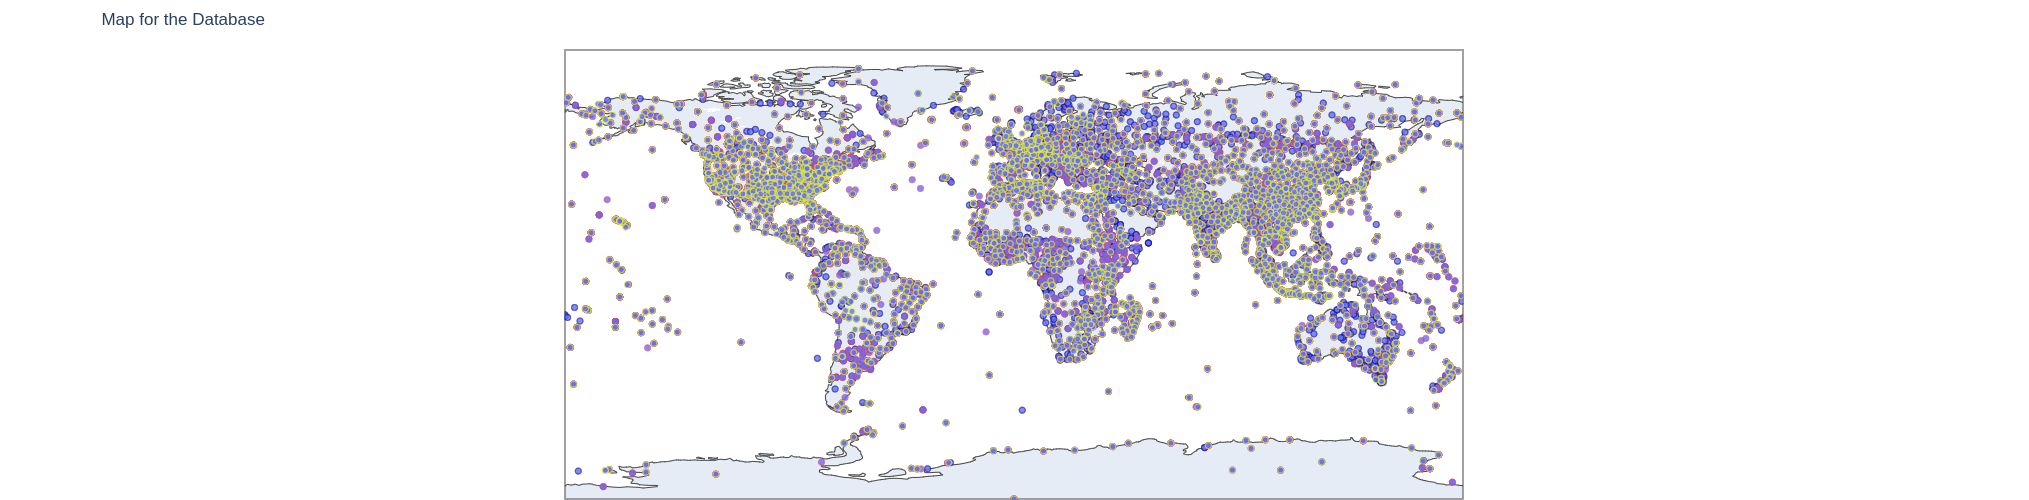

In [145]:
# scatterGeo
dbs = np.unique(all_df.db)

colors = dict(zip(dbs, np.arange(len(dbs))) ) # a dict that associates a numerical value to each state

fig = go.Figure(data=go.Scattergeo(
        lon = all_df['lon'],
        lat = all_df['lat'],
        #text = df['text'],
        mode = 'markers',
        marker = dict(
            #size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                #color='rgba(102, 102, 102)',
                color = [colors[s] for s in all_df['db']]
            ),
            #colorscale = 'Blues',
            #cmin = 0,
            #color = all_df['db'],
            #colorbar_title="Distribution of stations"
        )))



fig.update_layout(
    title="Map for the Database ",

    margin=dict(l=0, r=1, t=50, b=1),
    paper_bgcolor="white",
    width=1000,
    height=500)
    
fig.show()

